# Makes the advection numerics plot for the paper 

First test of moving all the functions to the external scipt




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from random import random
import matplotlib
from netCDF4 import Dataset
import matplotlib.cm as cm
import matplotlib.pyplot as plt    # The code below assumes this convenient renaming
import math
import seaborn as sns
sns.set()

from binomial_function_collection import *
import sys 
import pandas as pd

In [2]:
random_cmap = func_generate_random_cmap(100)


# Settings  and initialization

# Advection 

Currently trying to redo the plot for the paper with an example that does multiple grid cells advection at the same time. 




In [3]:
#Setup for fance paper plot comparing timesteps, cuts out all non advection related stuff

#--- Grid parameters ----------
nx   = 5     #grid size
ny   = 5
nsiz = 2       #nr of sizes in spectrum
ntim = 10     #nr of timesteps
nage = 1        #dimension of thermal demographics: number of thermal age strata

dx   = 1000.    #x gridspacing     [m]
dy   = 1000.     #y gridspacing     [m]
dsiz = 100.    #width of size bin [m]
dtim = 60.     #time increment    [s]


nage = 1   #demographics: number of object age strata


#--- Advection parameters
u  = dx/60./8. #x wind, used for advection [m/s]
v  = dy/60./8. #y wind, used for advection [m/s]




#--- declare arrays -----------
x    = ( np.array(range(nx  )) + 0.5) * dx
y    = ( np.array(range(ny  )) + 0.5) * dy
siz  = ( np.array(range(nsiz)) + 0.5) * dsiz
tim  = ( np.array(range(ntim)) + 0.5) * dtim

N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

np.random.seed(1)

In [4]:
# setting initial condition for advection, this three different versions of having everything start in the left, then run with three different timesteps

total_t = 12*60
n_small = 1000
n_big = 4

################################################################################################
ntim = 4

dtim = total_t/ntim
ntim = ntim+1
N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy,periodic_flag=False)

N_4 = N+0


################################################################################################
ntim = 2
dtim = total_t/ntim
ntim = ntim+1
N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy)

N_2 = N+0


################################################################################################
ntim = 1
dtim = total_t/ntim
ntim = ntim+1
N      = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy)

N_1 = N+0

/home/pgriewank/2020-binomial-clean/binomial_function_collection.py:319: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[0].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))
/home/pgriewank/2020-binomial-clean/binomial_function_collection.py:320: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[1].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))
/home/pgriewank/2020-binomial-clean/binomial_function_collection.py:321: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[2].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))


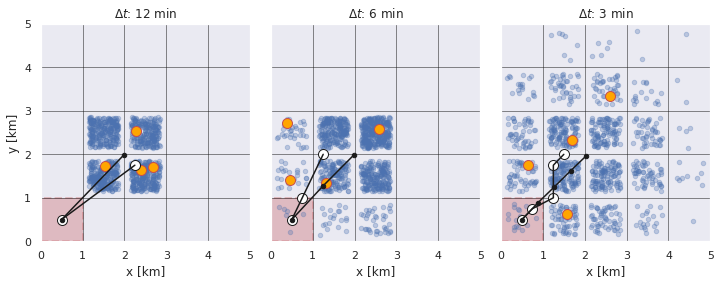

In [5]:
fig = func_advection_numerics_plot(N_1[:,:,:,:,0],N_2[:,:,:,:,0],N_4[:,:,:,:,0])


In [7]:
fig.savefig('fig/plot_advection_0520.pdf',bbox_inches='tight')

# lets try a assymettric version    

# Advection 

Currently trying to redo the plot for the paper with an example that does multiple grid cells advection at the same time. 




In [102]:
#Setup for fance paper plot comparing timesteps, cuts out all non advection related stuff

#--- Grid parameters ----------
nx   = 5     #grid size
ny   = 5
nsiz = 2       #nr of sizes in spectrum
ntim = 10     #nr of timesteps
nage = 1        #dimension of thermal demographics: number of thermal age strata

dx   = 1000.    #x gridspacing     [m]
dy   = 1000.     #y gridspacing     [m]
dsiz = 100.    #width of size bin [m]
dtim = 60.     #time increment    [s]


nage = 1   #demographics: number of object age strata


#--- Advection parameters
u  = dx/dtim/12. *2.5 #x wind, used for advection [m/s]
v  = dy/dtim/12.*1.5 #y wind, used for advection [m/s]




#--- declare arrays -----------
x    = ( np.array(range(nx  )) + 0.5) * dx
y    = ( np.array(range(ny  )) + 0.5) * dy
siz  = ( np.array(range(nsiz)) + 0.5) * dsiz
tim  = ( np.array(range(ntim)) + 0.5) * dtim

N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number
seed = 0

In [106]:
seed += 1
print('seed: ', seed)
np.random.seed(seed)
# setting initial condition for advection, this three different versions of having everything start in the left, then run with three different timesteps

total_t = 12*60
n_small = 1000
n_big = 4

################################################################################################
ntim = 4

dtim = total_t/ntim
ntim = ntim+1
N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy,periodic_flag=False)

N_4 = N+0


################################################################################################
ntim = 2
dtim = total_t/ntim
ntim = ntim+1
N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy,periodic_flag=False)

N_2 = N+0


################################################################################################
ntim = 1
dtim = total_t/ntim
ntim = ntim+1
N      = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy,periodic_flag=False)

N_1 = N+0

seed:  3
p_x p_y p_xy 0.39062500000000006 0.23076923076923067 0.5000000000000001
A_x A_y A_xy 0.39062500000000006 0.14062499999999994 0.23437500000000006
p_x p_y p_xy 0.39062500000000006 0.23076923076923067 0.5000000000000001
A_x A_y A_xy 0.39062500000000006 0.14062499999999994 0.23437500000000006
p_x p_y p_xy 0.39062500000000006 0.23076923076923067 0.5000000000000001
A_x A_y A_xy 0.39062500000000006 0.14062499999999994 0.23437500000000006
p_x p_y p_xy 0.39062500000000006 0.23076923076923067 0.5000000000000001
A_x A_y A_xy 0.39062500000000006 0.14062499999999994 0.23437500000000006
p_x p_y p_xy 0.39062500000000006 0.23076923076923067 0.5000000000000001
A_x A_y A_xy 0.39062500000000006 0.14062499999999994 0.23437500000000006
p_x p_y p_xy 0.39062500000000006 0.23076923076923067 0.5000000000000001
A_x A_y A_xy 0.39062500000000006 0.14062499999999994 0.23437500000000006
p_x p_y p_xy 0.39062500000000006 0.23076923076923067 0.5000000000000001
A_x A_y A_xy 0.39062500000000006 0.14062499999999

/home/pgriewank/2020-binomial-clean/binomial_function_collection.py:319: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[0].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))
/home/pgriewank/2020-binomial-clean/binomial_function_collection.py:320: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[1].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))
/home/pgriewank/2020-binomial-clean/binomial_function_collection.py:321: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[2].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))


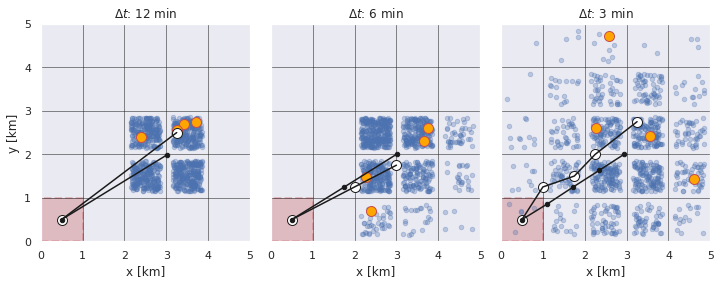

In [113]:
fig = func_advection_numerics_plot(N_1[:,:,:,:,0],N_2[:,:,:,:,0],N_4[:,:,:,:,0])


In [114]:
fig.savefig('fig/plot_advection_0520.pdf',bbox_inches='tight')

In [100]:
#################################################################################################################
# Advection 
#################################################################################################################

def func_advection_binomial_2D(N_sub_2D_t0,v_x_rel,v_y_rel,periodic_flag = True):
    """
    New and improved version of the binomial advection funtion for 2D rectangular grids. 
    
    created by Philipp Griewakn 2020-03-24
    
    General approach of the function is that it first does the fractional advection (i.e. advection that is not a full gridbox) using binomial trials. Afterwards it moves the objects around the full grid spacing 
    For example:
    for v_x_rel = 0.5, everything is moved half a grid to the right using binomial sampling
    for v_x_rel =-0.5, everything is moved half a grid to the right using binomial sampling, then shifted one to the left afterwards
    for v_x_rel = 1.5, everything is moved half a grid to the right using binomial sampling, then shifted one to the right afterwards
    
    The binomial trials first go in x, than in y, and then in xy directions. probabilities p are calculated accordingly.
    Does not work if the advections is farther than the total grid size, i.e. around the 2D grid in one timestep. 
    Should be pretty dirt cheap. If not, Philipp coded something shitty.  
    
    Includes periodic boundary conditions by default, and automaticall checks for conservation if enabled
   
    Parameters
    -----------
    N_sub_2D_t0   : 2D array of the number of objects on the 2D grid
    v_x_rel       : Advection speed devided by grid spacing in x direction     
    v_y_rel       : Advection speed devided by grid spacing in y direction     
    periodic_flag : Set to True by default, adds a periodic boundary to the 2D domain. If set to False, advection from outside the domain is set to zero
    
    Returns
    -----------
    N_sub_2D_t1   : New 2D array of where the objects are post advection.  
    
    Examples
    -----------
    N = np.zeros([10,10]).astype(int)
    N[0:2,0:2] = 10
    N = func_advection_binomial_2D(N,2.5,-3.2)
    plt.pcolormesh(N) 
    """
   
    # first thing is to split the relative displacement into fractional and whole displacement
    # The fractional displacement is done first, and is equivalent to the original displacement that only allowed movements of up to one grid cell
    # For the meantime I will try to formulate things so they are fine with negative v_x and v_y
    
    # After that everything is moved whole gridboxes in a direction for the whole displacement 
    
    v_x_rel_whole = int(np.floor(v_x_rel))  
    v_y_rel_whole = int(np.floor(v_y_rel))
    
    v_x_rel_frac = v_x_rel-v_x_rel_whole  
    v_y_rel_frac = v_y_rel-v_y_rel_whole
    
    #This only works as long as the whole displacement is smaller than the total size of the domain, so:
    if abs(v_x_rel_whole)>=N_sub_2D_t0.shape[0]:
        print  ('x displacement is greater than grid size, advection routine does not like this')
        return -1
    if abs(v_y_rel_whole)>=N_sub_2D_t0.shape[1]:
        print  ('y displacement is greater than grid size, advection routine does not like this')
        return -1
    
    #So, fractional displacement starts here: 
    
    #The Areas and probabilities should are calculated from the fractional advection values, this wasn't really carefully thought through, but I think it should be correct
    
    A_x  = v_x_rel_frac-v_x_rel_frac*v_y_rel_frac
    A_y  = v_y_rel_frac-v_x_rel_frac*v_y_rel_frac
    A_xy = v_y_rel_frac*v_x_rel_frac
    A = 1
    p_x  = A_x/A
    p_y  = A_y/(A-A_x)
    p_xy = A_xy/(A-A_x-A_y)
    
    print('p_x','p_y','p_xy',p_x,p_y,p_xy)
    print('A_x','A_y','A_xy',A_x,A_y,A_xy)
    
    #Now do and x, y, and xy separately, and loop over all N_sub
    N_x  = np.zeros_like(N_sub_2D_t0)
    N_y  = np.zeros_like(N_sub_2D_t0)
    N_xy = np.zeros_like(N_sub_2D_t0)
    
    #Binomal sampling in the 3 directions 
    N_x  = np.random.binomial(N_sub_2D_t0,p_x)
    N_y  = np.random.binomial(N_sub_2D_t0-N_x,p_y)
    N_xy = np.random.binomial(N_sub_2D_t0-N_x-N_y,p_xy)
    
    #Applying the binomial advection to the initial state, including periodic boudnary domain
    N_sub_2D_t1 = N_sub_2D_t0 +0
    
    N_sub_2D_t1[1: ,:] = N_sub_2D_t1[1: ,:] + N_x[:-1,:] 
    N_sub_2D_t1[:,1: ] = N_sub_2D_t1[:,1: ] + N_y[:,:-1] 
    N_sub_2D_t1[1: ,1: ] = N_sub_2D_t1[1: ,1: ] + N_xy[:-1,:-1] 
    
    
    N_sub_2D_t1[:,:] = N_sub_2D_t1[:,:] - N_x[:,:] 
    N_sub_2D_t1[:,:] = N_sub_2D_t1[:,:] - N_y[:,:] 
    N_sub_2D_t1[:,:] = N_sub_2D_t1[:,:] - N_xy[:,:] 
    if periodic_flag==True: 

        #periodic boundaries in x and y is easy
        N_sub_2D_t1[0 ,:] = N_sub_2D_t1[0 ,:] + N_x[-1,:] 
        N_sub_2D_t1[:,0 ] = N_sub_2D_t1[:,0 ] + N_y[:,-1]

        #for xy is a pain in the ass. Needs the first row, first column, and 0,0 thing separately
        N_sub_2D_t1[0  ,1: ] = N_sub_2D_t1[0 ,1: ] + N_xy[-1,:-1] 
        N_sub_2D_t1[1: , 0 ] = N_sub_2D_t1[1: ,0 ] + N_xy[:-1,-1] 
        N_sub_2D_t1[0  , 0 ] = N_sub_2D_t1[0 ,0 ] + N_xy[-1,-1] 

    
    # Now the whole displacement, which is a simple movement in x and y direction. Just have to sort out how to do write it nicely and deal with periodic boundary domains.  
    # Need to make a copy of the N_sub_2D_t1 to not overwrite stuff
    N_sub_copy = N_sub_2D_t1 + 0.
    
    # x direction
    t = v_x_rel_whole
    if t > 0:
        N_sub_2D_t1[t:,:]=N_sub_copy[:-t,:]
        if periodic_flag:
            N_sub_2D_t1[:t,:]=N_sub_copy[-t:,:]
        else:       
            N_sub_2D_t1[:t,:] = 0.
    if t < 0:
        N_sub_2D_t1[:t,:]=N_sub_copy[-t:,:]
        if periodic_flag:
            N_sub_2D_t1[t:,:]=N_sub_copy[:-t,:]
        else:      
            N_sub_2D_t1[t:,:] = 0.
    
    N_sub_copy = N_sub_2D_t1 + 0.
    
    # y direction
    t = v_y_rel_whole
    if t > 0:
        N_sub_2D_t1[:,t:]=N_sub_copy[:,:-t]
        if periodic_flag:
            N_sub_2D_t1[:,:t]=N_sub_copy[:,-t:]
        else:       
            N_sub_2D_t1[:,:t] = 0.
    if t < 0:
        N_sub_2D_t1[:,:t]=N_sub_copy[:,-t:]
        if periodic_flag:
            N_sub_2D_t1[:,t:]=N_sub_copy[:,:-t]
        else:        
            N_sub_2D_t1[:,t:] = 0.
    
    if periodic_flag:
        if np.sum(N_sub_2D_t0) != np.sum(N_sub_2D_t1):
            print('wtf! No advection conservation')
    
    
    
    return N_sub_2D_t1



